<a href="https://colab.research.google.com/github/Asadsammar/PCVK_TI3I/blob/main/Assignment_W11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

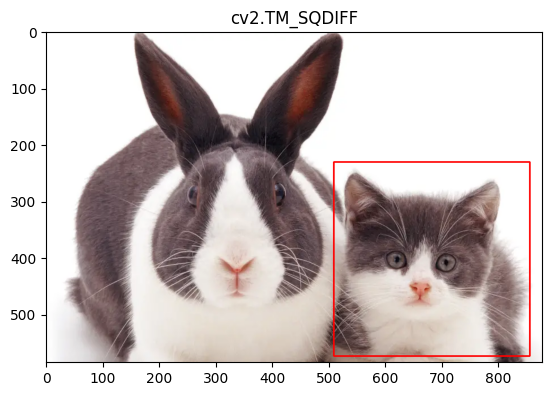

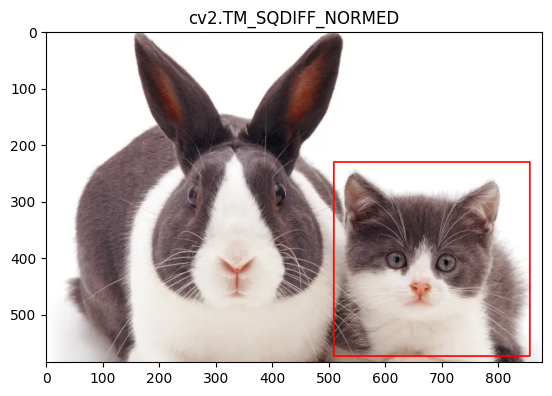

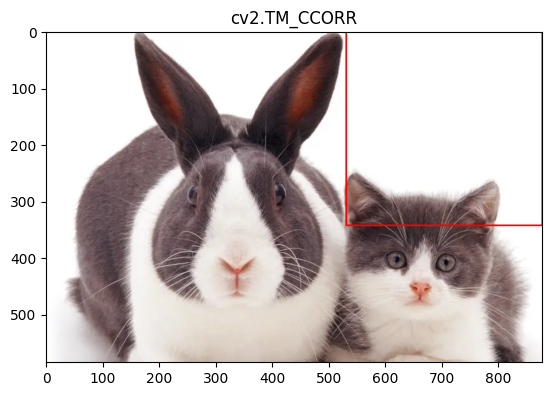

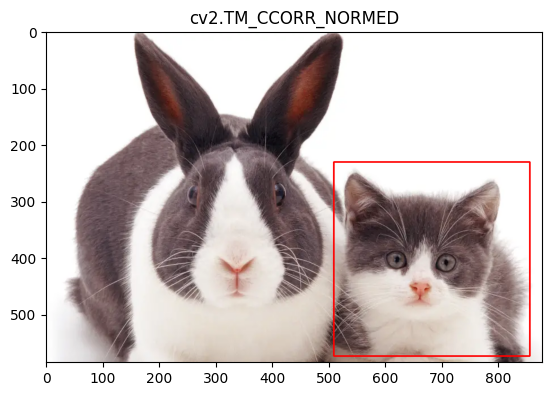

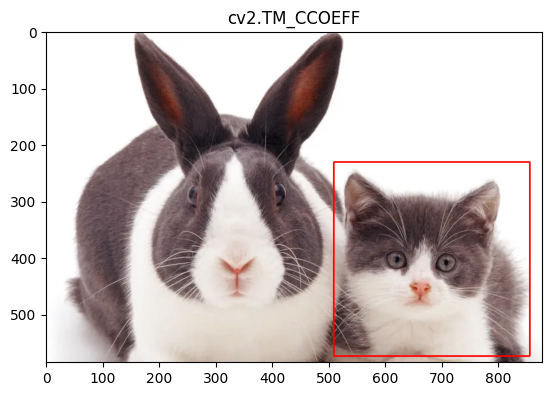

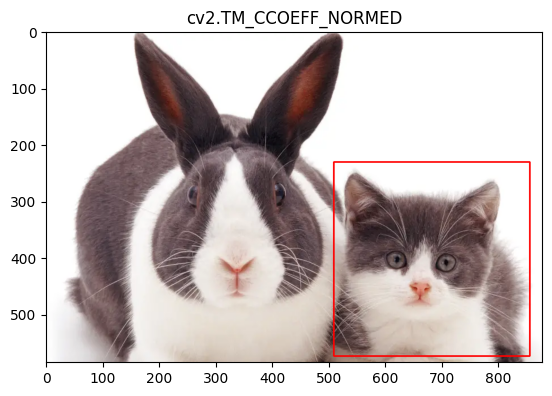

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load source and template images
source_img = cv2.imread('/content/drive/MyDrive/cats_and_bunnies.jpg')
template_img = cv2.imread('/content/drive/MyDrive/cats_template.jpg')

# Apply all 6 matching methods
methods = ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED']
for method in methods:
    # Create a copy of the source image to draw the bounding box
    source_img_copy = source_img.copy()

    # Apply template matching
    result = cv2.matchTemplate(source_img_copy, template_img, eval(method))
    # Find location of the best match
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if eval(method) in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        match_loc = min_loc
    else:
        match_loc = max_loc
    # Draw a red bounding box around the detected cat face
    w, h = template_img.shape[:-1]
    cv2.rectangle(source_img_copy, match_loc, (match_loc[0] + h, match_loc[1] + w), (0, 0, 255), 2)

    # Display the output image with the red box around the detected cat face for the current method
    plt.imshow(cv2.cvtColor(source_img_copy, cv2.COLOR_BGR2RGB))
    plt.title(method)
    plt.show()

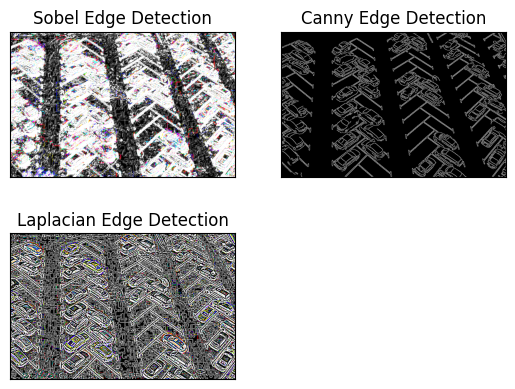

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load your image
img = cv2.imread('/content/drive/MyDrive/CV_W11/parking-lot-cars.jpg')

# Apply Gaussian blur to the image
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Sobel Edge Detection
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)

# Convert depth of Sobel result to CV_8U
sobel = sobelx + sobely
sobel_8u = cv2.convertScaleAbs(sobel)

# Canny Edge Detection
edges = cv2.Canny(blurred, 100, 200)

# Laplacian Edge Detection
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

# Display the images
plt.subplot(2, 2, 1), plt.imshow(cv2.cvtColor(sobel_8u, cv2.COLOR_BGR2RGB))
plt.title('Sobel Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection'), plt.xticks([]), plt.yticks([])

plt.show()

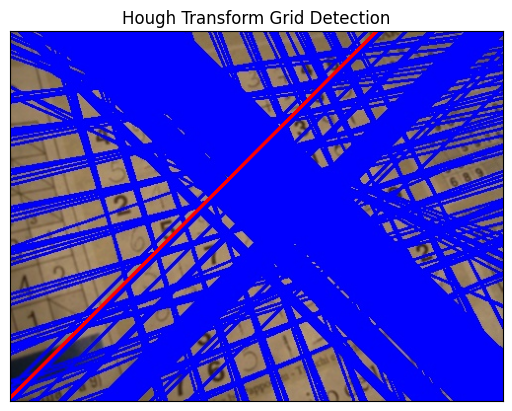

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load your image
img = cv2.imread('/content/drive/MyDrive/CV_W11/sudoku.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny Edge Detection
edges = cv2.Canny(img_gray, 50, 150, apertureSize=3)

# Apply Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Draw lines on the original image
for rho, theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform Grid Detection')
plt.xticks([]), plt.yticks([])
plt.show()

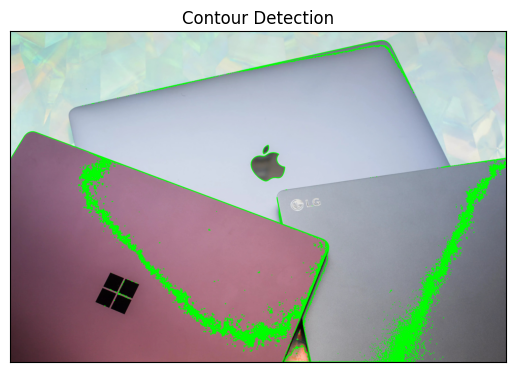

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load your image
img = cv2.imread('/content/drive/MyDrive/CV_W11/laptop.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
ret, thresh = cv2.threshold(img_gray, 127, 255, 0)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection')
plt.xticks([]), plt.yticks([])
plt.show()